In [191]:
#LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix




In [192]:
#WE'LL LOAD THE DATASET NOW


# Load dataset
creditscoring_dataset = pd.read_csv('/content/sample_data/Credit Score Classification Dataset.csv')




In [193]:
creditscoring_dataset.head(7)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
5,50,Male,150000,Master's Degree,Married,0,Owned,High
6,26,Female,40000,Associate's Degree,Single,0,Rented,Average


In [194]:
creditscoring_dataset.tail(9)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
155,38,Female,67500,Bachelor's Degree,Married,2,Owned,High
156,43,Male,92500,Master's Degree,Single,0,Owned,High
157,48,Female,82500,Doctorate,Married,1,Owned,High
158,53,Male,122500,Associate's Degree,Married,0,Owned,High
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


In [195]:
creditscoring_dataset.shape

(164, 8)

In [196]:
creditscoring_dataset.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [197]:
#FIGURING OUT THE MISSING VALUES IN THE DATASET

print("The number of missing values in the dataset is:\n", creditscoring_dataset.isnull().sum())

#THE MISSING VALUES ARE TO BE REPLACED WITH AVERAGE/MEAN OF THAT RESPECTIVE COLUMN
#IT IS APPLICABLE FOR COLUMNS BASED ON NUMERICAL DATA


creditscoring_dataset.fillna(creditscoring_dataset.mean(numeric_only=True), inplace=True)



The number of missing values in the dataset is:
 Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


Text(0.5, 1.0, 'Box Plot')

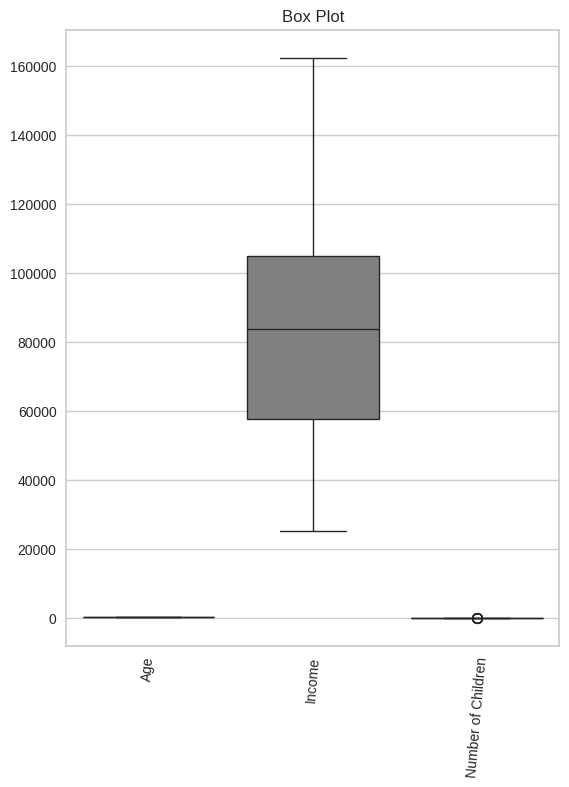

In [198]:
#BOX PLOT FOR DATA VISUALIZATION

plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
sns.boxplot(data=creditscoring_dataset,palette='gray')
plt.xticks(rotation=85)
plt.title('Box Plot')

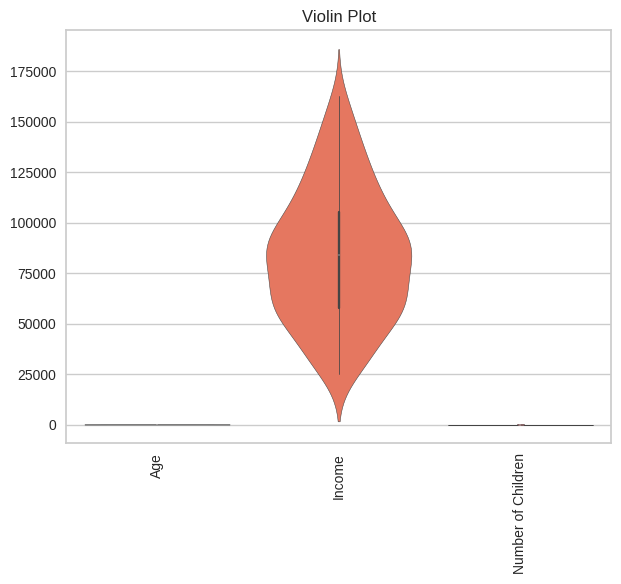

In [199]:
#VIOLIN PLOT FOR DATA VISUALIZATION

plt.figure(figsize=(12, 6))



plt.subplot(1, 2, 2)
sns.violinplot(data=creditscoring_dataset,palette='Reds')
plt.xticks(rotation=90)
plt.title('Violin Plot')

plt.tight_layout()
plt.show()



In [200]:
#WE DO HAVE COLUMNS WITH CATEGORICAL VALUES IN THE DATASET, WE'LL APPLY LABEL ENCODING ON THEM




# LABEL ENCODING IS TO BE APPLIED ON CATEGORICAL COLUMNS
lab_enc = {}
cat_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership']

# LABEL ENCODING IS APPLIED TO THE DATASET'S CATEGORICAL COLUMNS
for colu in cat_columns:
    lenco = LabelEncoder()
    creditscoring_dataset[colu] = lenco.fit_transform(creditscoring_dataset[colu])
    lab_enc[colu] = lenco

# Encode target variable, i.e., Credit Score
tar_enc = LabelEncoder()
creditscoring_dataset['Credit Score'] = tar_enc.fit_transform(creditscoring_dataset['Credit Score'])

# WE NOW WILL VERIFY ENCODING
print(creditscoring_dataset.head())

   Age  Gender  Income  Education  Marital Status  Number of Children  \
0   25       0   50000          1               1                   0   
1   30       1  100000          4               0                   2   
2   35       0   75000          2               0                   1   
3   40       1  125000          3               1                   0   
4   45       0  100000          1               0                   3   

   Home Ownership  Credit Score  
0               1             1  
1               0             1  
2               0             1  
3               0             1  
4               0             1  


Logistic Regression Classification Report for the Classifier:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.96      0.96      0.96        23
           2       1.00      1.00      1.00         5

    accuracy                           0.94        33
   macro avg       0.92      0.92      0.92        33
weighted avg       0.94      0.94      0.94        33



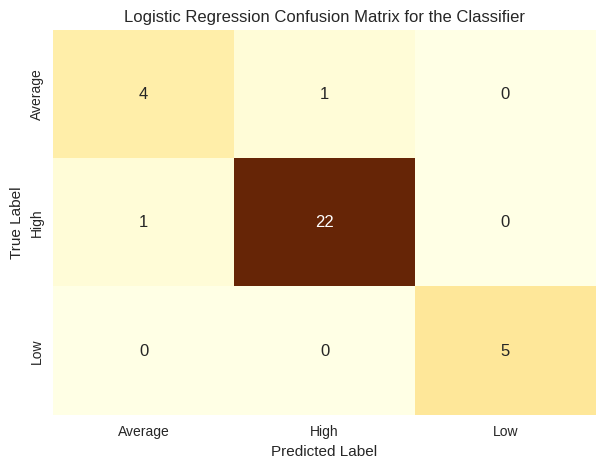

Random Forest Classification Report for the Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



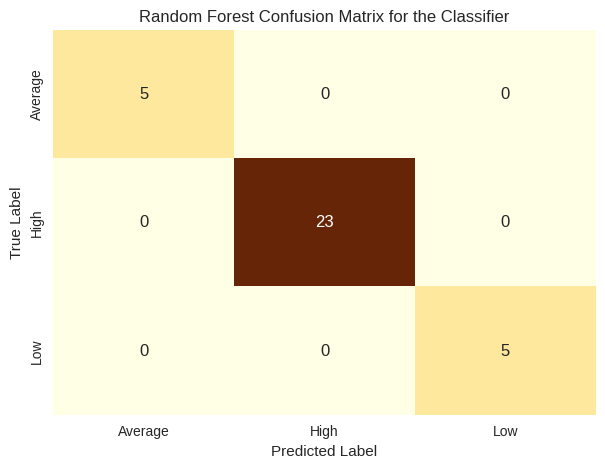

SVM Classification Report for the Classifier:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.96      0.96      0.96        23
           2       1.00      0.80      0.89         5

    accuracy                           0.91        33
   macro avg       0.87      0.85      0.86        33
weighted avg       0.92      0.91      0.91        33



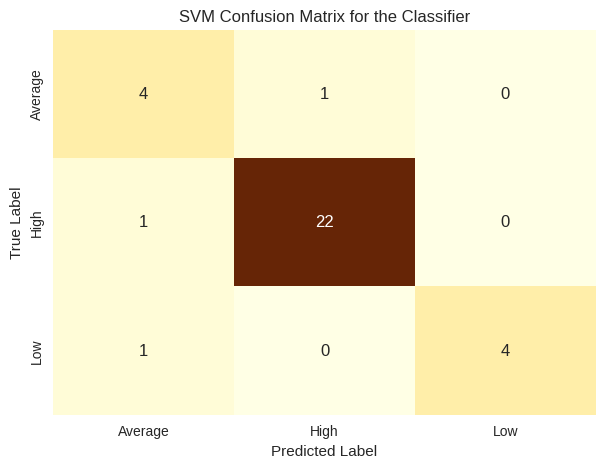

Naive Bayes Classification Report for the Classifier:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.96      0.96      0.96        23
           2       0.71      1.00      0.83         5

    accuracy                           0.88        33
   macro avg       0.78      0.79      0.76        33
weighted avg       0.88      0.88      0.87        33



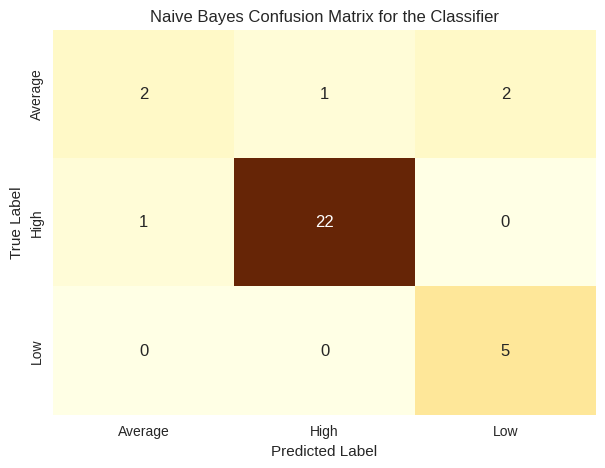

In [201]:



# THE DATA IS THEN SPLIT INTO FEATURES AND TARGET VARIABLES

X = creditscoring_dataset.drop('Credit Score', axis=1)
y = creditscoring_dataset['Credit Score']

# 80-20 train,test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# FEATURE STANDARDIZATION

sca = StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.transform(X_test)

# THE FOLLOWING CLASSIFIERS ARE USED

Classif = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

# Train models, make predictions, and plot confusion matrices
for nameofmodel, model in Classif.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_predicted = model.predict(X_test)

    # Print classification report
    print(f"{nameofmodel} Classification Report for the Classifier:\n", classification_report(y_test, y_predicted))

    # Compute confusion matrix
    con_mat = confusion_matrix(y_test, y_predicted)

    # Plot confusion matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(con_mat, annot=True, fmt='d', cmap='YlOrBr', cbar=False,
                xticklabels=tar_enc.classes_, yticklabels=tar_enc.classes_)
    plt.title(f'{nameofmodel} Confusion Matrix for the Classifier')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [202]:
# WE HAVE TO HANDLE UNSEEN LABELS IN DATA TOO

def encodingour_data(dat, enc):
    encod_dat = dat.copy()
    for column in enc:
        if dat[column].dtype == 'object':
            le = enc[column]
            uni_lab = le.classes_.tolist() #for unique labels
            # Add any new labels to the encoder
            for lab in dat[column].unique():
                if lab not in uni_lab:
                    le.classes_ = np.append(le.classes_, lab)
            encod_dat[column] = le.transform(dat[column])
    return encod_dat

# NOW PREDICTIONS ARE TO BE MADE
newdata = pd.DataFrame({
    'Age': [51],
    'Gender': ['Male'],
    'Income': [135000],
    'Education': ["Bachelor's"],
    'Marital Status': ['Married'],
    'Number of Children': [0],
    'Home Ownership': ['Owned']
})

# NEW DATA IS TO BE ENCODED TOO
encode_newdata = encodingour_data(newdata, lab_enc)
encode_newdata = sca.transform(encode_newdata)

#PREDICTIONS FOR NEW DATA
for name, model in Classif.items():
    prediction = model.predict(encode_newdata)
    # Decode the prediction to original label
    original_label = tar_enc.inverse_transform(prediction)
    print(f"{name} Prediction for the provided data is : {original_label[0]}")


Logistic Regression Prediction for the provided data is : High
Random Forest Prediction for the provided data is : High
SVM Prediction for the provided data is : High
Naive Bayes Prediction for the provided data is : High
